<div class="alert alert-info" align = "center"> <h1> KCHOUSE - Exploratory Data Analysis </h1> </div>

[content table](#content_table)
<a id="business_understanding"></a>
# <font color=red> 1. Overview
    
### <font color=blue> 1.1. Business Problem & Machine Learning Problem
    
This notebook is to employ techniques of linear regression, non-linear regression to build ML models to preict Price of a House based on its characteristics how many rooms the home has or the location of the house plus a whole bunch of factors. Also, it provides the tool to evaluate the contribution of each factor in predictive model, which features of a house are more important in determining the house price and which factors are less important in determining the house price.
    
<a id="content_table"></a>
### <font color=blue> 1.2 Table of contents </font>

<b>[Part 1. Overview](#business_understanding) </b><br>
1.1) Business Objective<br>
1.2) Machine Learning Problem

<b>[Part 2. Setup](#setup)</b><br>
2.1) Configuration<br>
2.2) Librabries<br>

<b>[Part 3. Data Understanding](#data_understanding)</b><br>
3.1) Data Collection<br>
3.2) Data Description<br>
3.3) Data Filteration<br>
3.4) Data Structure<br>

<b>[Part 4. Cleansing data](#data_cleansing)</b><br>

<b>[Part 5. Exploratory Data Analysis](#data_exploration)</b><br>
5.1) Descriptive Statistics<br>
5.2) Examine Missing values<br>
5.3) Train-Test split<br>
5.4) Categorize vars<br>
5.5) Univariate Analysis- Target var<br>
5.6) Univariate Analysis- Discrete vars<br>
5.7) Univariate Analysis- Contionuous vars<br>
5.8) Univariate Analysis- Temporal vars<br>
5.9) Univariate Analysis- Categorical var<br>
5.10) Mutivariate Analysis<br>

<b>[Part 6. Summary](#summary)</b><br>

### References:
1) <a src=""> </a> ref1 <br>

---
---
[content table](#content_table)
<a id="setup"></a>

# <font color=red> 2. Setup Development Environment

### <font color=blue> 2.1. Import library

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
from pathlib import Path
import os

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Dataframe manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, scale

# Modelling Helpers:
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate

# math and statistics
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
# import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math
from math import sqrt

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### <font color=blue> 2.2. Configuration

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# sns.set(style = 'whitegrid',context = 'notebook')
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


---
---
[content table](#content_table)
<a id="data_understanding"></a>
# <font color=red> 3. Data Understanding
    
This task involves taking a closer look into the data available and understanding it in further detail before starting the process of analysis. This involves merging relevant data together, describing the various attributes, specifying features of interests or valid data. This phase is important because bad data or insufficient knowledege about available data can have cascading adverse effects in the later stages of the analysis 

### <font color=blue> 3.1. Data Collection
    


In [3]:
df = pd.read_csv("kc_house_data.csv")
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Overall, the dataset has 21,613 observations and 21 columns

### <font color=blue> 3.2. Data Description

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### <font color=blue> 3.3. Data Profiling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
pd.options.display.float_format = '{:.3f}'.format
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.000,NaN,NaN,NaN,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,7308900445.000,9900000190.000
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.000,NaN,NaN,NaN,540088.142,367127.196,75000.000,321950.000,450000.000,645000.000,7700000.000
bedrooms,21613.000,NaN,NaN,NaN,3.371,0.930,0.000,3.000,3.000,4.000,33.000
bathrooms,21613.000,NaN,NaN,NaN,2.115,0.770,0.000,1.750,2.250,2.500,8.000
sqft_living,21613.000,NaN,NaN,NaN,2079.900,918.441,290.000,1427.000,1910.000,2550.000,13540.000
sqft_lot,21613.000,NaN,NaN,NaN,15106.968,41420.512,520.000,5040.000,7618.000,10688.000,1651359.000
floors,21613.000,NaN,NaN,NaN,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21613.000,NaN,NaN,NaN,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21613.000,NaN,NaN,NaN,0.234,0.766,0.000,0.000,0.000,0.000,4.000


### <font color=blue> 3.4. Summary

There are several things can be observed:

+ Overall, the dataset has 21,613 observations and 21 columns
    
+ Column id contains unique number that represent each house, hence it's not attribute of data and is removed from the final data

+ type of zipcode should be changed to object, not integer
    
+ target variable is 'price'    

+ Attributes include numerical, categorical and temporal data type

+ There is no missing data in all columns

---
---
[content table](#content_table)
<a id="data_cleansing"></a>
# <font color=red>4. Cleansing data and construct dataset
    
Data in its raw form is rarely consumable by Machine Learning methods to build models. Hence we need to process the data based on its form, clean underlying errors and inconsistencies, convert data to appropriate data type, constructing dataset for model building. Following are the main tasks relevant to data wrangling and cleansing:

+ Data Integration: In case there are multiple datasets that need to be integrate or merge
+ Data Formating: Curating and formatting data into necessary formats (CSV, Jason, relational
+ Dataset Construction: Define independent variables and dependent variables. If the dependent variable is not available yet, we can create it by preprocessing data
+ Standardize attribute column names: Standardizing attribute column names to make them more readable, intuitive, consistent and conforming to certain standards for everyone involved to understand
+ Fixing data issues: Handling data issues (delete invalid data, duplicated data, remove unncessary attributes, fix inconsistencies), Handling ambiguous attribute values, incorrect data, )
+ Type casting: Typecasting or converting data into appropriate data types is an important part of cleanup and wrangling in general. Often data gets converted into wrong data types while being extracted or converted from one form to the other. Also different platforms and systems handle each data type differently and thus getting the right data type is important

In [6]:
# Select features of interest
features = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'
all_vars = features + [target]
df = df[all_vars]

# Select valid data: having target value > 0
df = df[df.price > 0]
# Remove duplicated rows
df = df.drop_duplicates(keep='last')
# Select a subset of data (in case the dataset is large and it is sufficient to train model on a smaller sample)
# df = df.sample(n=200000, random_state=1)

# Standardize column name
feature_name = {'date': 'date',
                'price': 'price'}
df.rename(columns=feature_name, inplace=True)

# data type conversion
new_data_type = {'zipcode': 'object'}
for key in new_data_type:
    df[key] = df[key].astype(new_data_type[key])

# reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(21613, 20)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,20141013T000000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,221900.000
1,20141209T000000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,538000.000
2,20150225T000000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,180000.000
3,20141209T000000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,604000.000
4,20150218T000000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,510000.000


---
---
[content table](#content_table)
<a id="data_exploration"></a>
# <font color=red>5. Exploratory Data Analysis

Exploratory data analysis, also known as EDA, is a crucial step in the lifecycle. Here, the main objective is to explore and understand pattern of data. The common tools for this are descriptive statistics, charts and visualizations to look at various data attributes, find associations and correlations and make a note of data quality problems if any

Following are some of the major tasks in this stage:
+ Explore, describe, and visualize data attributes
+ Select data and attributes subsets that seem most important for the problem
+ Extensive analysis to find correlations and associations and test hypotheses
+ Note data issues such as missing data points, outliers, ...

### <font color=blue> 5.1. Examine missing values


In [7]:
miss_val_df = pd.DataFrame(df.isnull().sum(), columns=['ColumnName'])
miss_val_df['Percentage'] = 100 * df.isnull().sum()/len(df)
miss_val_df.sort_values('Percentage', ascending=False)

,ColumnName,Percentage
date,0,0.000
bedrooms,0,0.000
sqft_lot15,0,0.000
sqft_living15,0,0.000
long,0,0.000
lat,0,0.000
zipcode,0,0.000
yr_renovated,0,0.000
yr_built,0,0.000
sqft_basement,0,0.000


### <font color=blue> 5.2. Create the train - test set

It is best practice to set aside part of the data at this stage (before performing Exploratory Data Analysis). This is because our brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumple upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset and set them aside. However, in order to generate the same shuffled indices for the next time, we can set the random number generator's seed

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

df_train = train_set.copy()
df_test = test_set.copy()

df_train.shape, df_test.shape

((17290, 20), (4323, 20))

### <font color=blue> 5.3. Categorize vars by data type
    
As depending on types of data, different charts and transformation are employed to analyze, it is useful to categorize vars by data type get better organizing data exploration step

In [9]:
# target
target_var = 'price'
print("\nTarget var: ", target_var)

# text vars
text_vars = []
print("\nText vars: ", text_vars)
print('There are {} text variables'.format(len(text_vars)))

# date time vars
datetime_vars = ['date']
# datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\nDateTime vars: ", datetime_vars)
print("There are {} DateTiem variables".format(len(datetime_vars)))

# cat vars
cat_vars = [var for var in df_train.columns if df_train[var].dtypes == 'O' if var not in [target_var] + text_vars + datetime_vars]
print("\nCategorical vars: ", cat_vars)
print("There are {} categorical variables".format(len(cat_vars)))

# num vars
num_vars = [var for var in df_train.columns if df_train[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print("There are {} numerical variables".format(len(num_vars)))

# dis_vars
dis_vars = [var for var in num_vars if len(df_train[var].unique()) < 50]
print("\nDiscrete vars: ", dis_vars)
print("There are {} discrete vars".format(len(dis_vars)))

# continous vars
cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinuous vars: ", cont_vars)
print("There are {} continuous vars".format(len(cont_vars)))

### <font color=blue> 5.5 Examine Target variable


Target var:  price

Text vars:  []
There are 0 text variables

DateTime vars:  ['date']
There are 1 DateTiem variables

Categorical vars:  ['zipcode']
There are 1 categorical variables

Numerical vars:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
There are 17 numerical variables

Discrete vars:  ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
There are 7 discrete vars

Continuous vars:  ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
There are 10 continuous vars


### <font color=blue> 5.4 Examine Target variable

#### Exploring the PDFs

A greate step in the data exploration is to display the probability distribution function (PDF) of a variable. This makes it very easy to spot anomalies, such as outliers. The PDF is often the basis on which we decide whether we want to transform a feature.

Skewness: 4.129383
Kurtosis: 36.366127


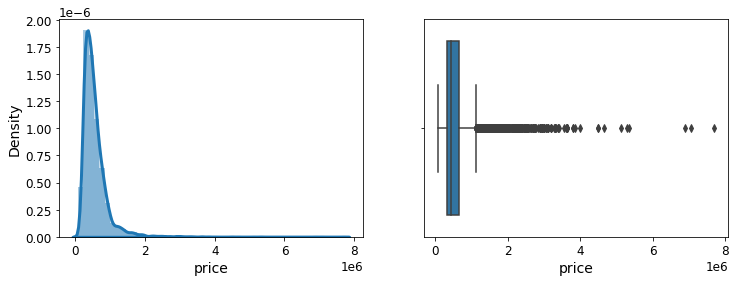

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df_train[target_var], hist=True, kde=True, kde_kws={'shade':True, 'linewidth':3})
plt.subplot(122)
sns.boxplot(df_train[target_var])
print('Skewness: %f' %df_train[target_var].skew())
print('Kurtosis: %f' %df_train[target_var].kurt())

In [11]:
df_train['price'].describe()

count     17290.000
mean     542799.838
std      372439.026
min       75000.000
25%      324000.000
50%      453000.000
75%      647500.000
max     7700000.000
Name: price, dtype: float64

=> Some noticed points from visualization:

+  Price has a mean around 543 thousand dollars, the minimum price is 75 thousand dollars, twenty five percent of price are under 325 thousand dollars, 50 percent below eleven thousand five hundred dollars and seventy five percent are lower than 648 thousand dollars. Yet the maximum price is 7 million and 700 thousand dollars. This shows that the distribution is heavily skewed on the right. 

+ It looks like most of our houses are falling somewhere between zeo and maybe around 1.5 million dollars. Obviously there are outliers in the price available for the really expensive houses. Outliers are observations that lie on abnormal distance from other observations in the data, they will affect the regression dramatically in cost coefficients to be inflated as the regression will try to place the line closer to those values. 

+ In linear  regression model, it is assumed that this variable should follow a normal distribution of price, however has an exponential one due to existing outliers. This will surely be a problem for linear regression model. 

### <font color=blue>5.5 Examine Discrete vars

#### Show discreate vars

In [12]:
df_train[dis_vars].head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,3,1.000,1.000,0,0,4,7
1,3,2.500,1.000,0,0,4,8
2,3,1.500,1.000,0,0,3,8
3,4,2.500,2.000,0,0,3,8
4,3,2.500,2.000,0,0,3,7


#### Distribution

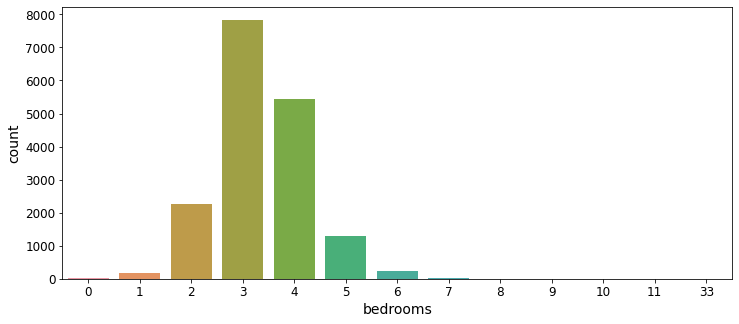

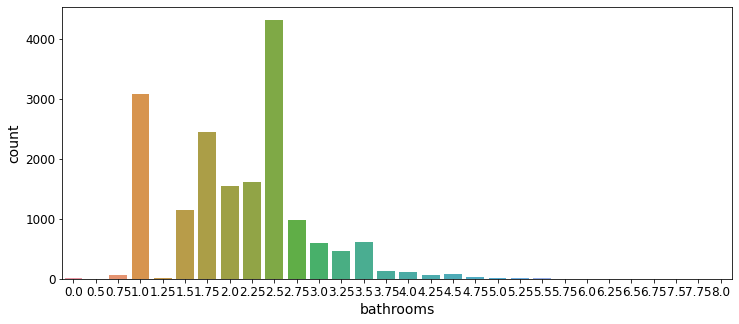

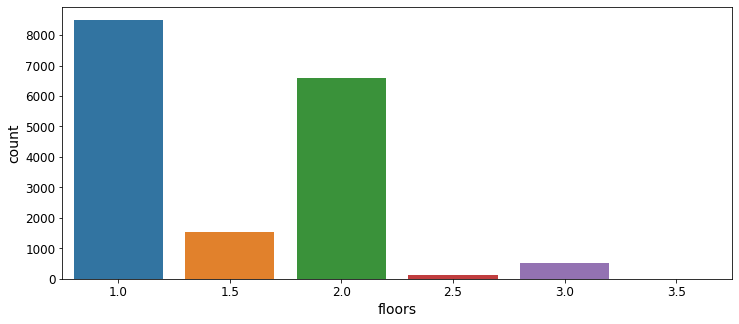

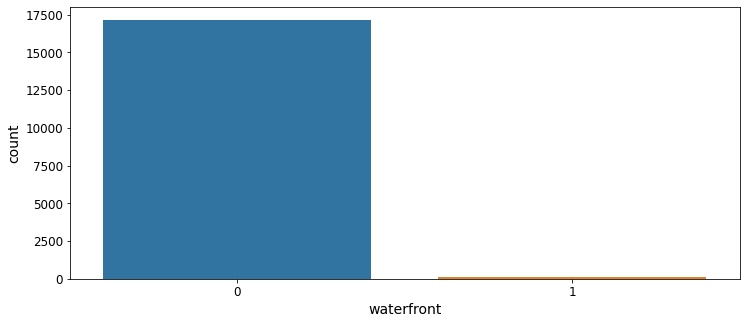

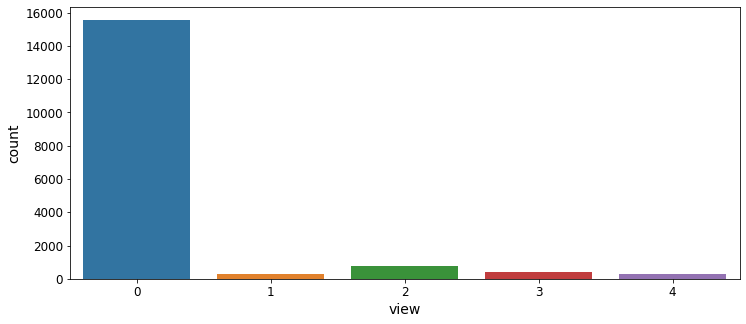

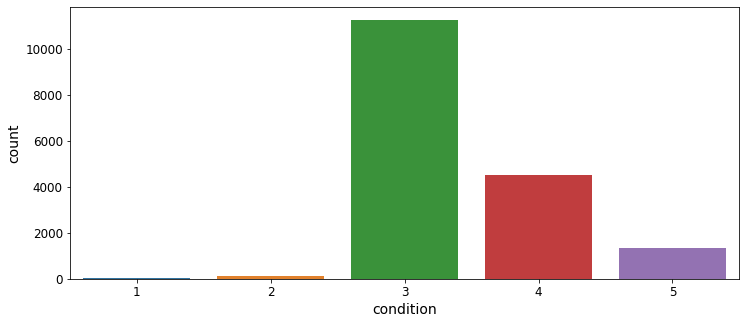

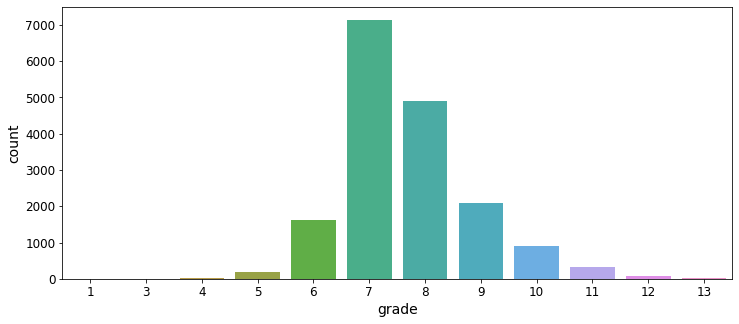

In [13]:
for var in dis_vars:
    plt.figure(figsize=(12,5))
    sns.countplot(df_train[var])
    plt.show()

=> Majority of houses have: 
+ between two and five bedrooms
+ between one to 3 bathrooms
+ between 1 to 2 floors
+ no waterfront
+ no view
+ between 3 and 4 condition
+ between 6 and 9 grade

#### Relationship between features and price

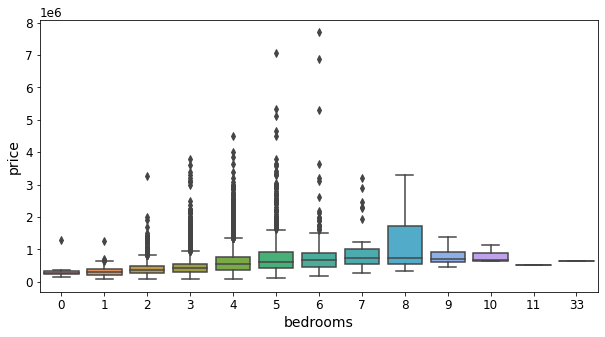

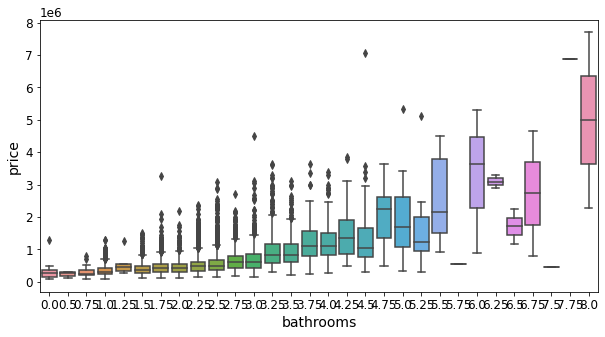

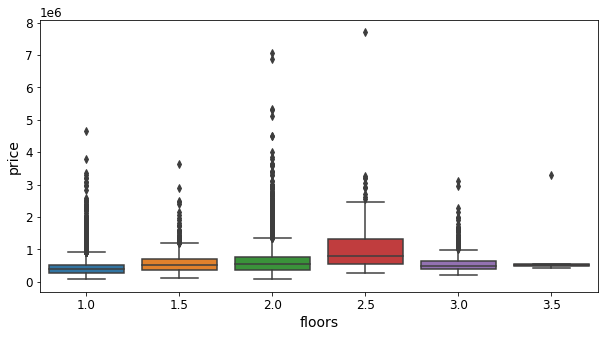

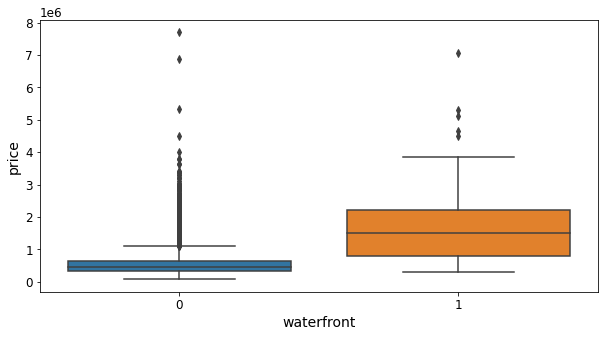

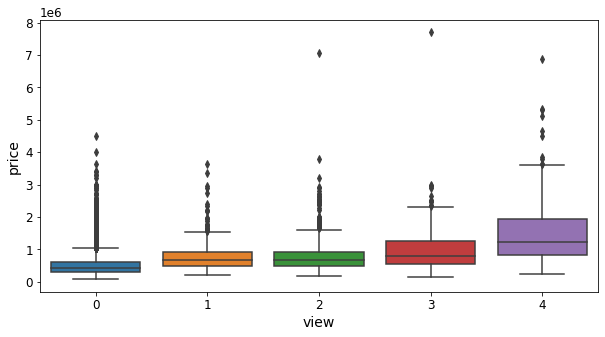

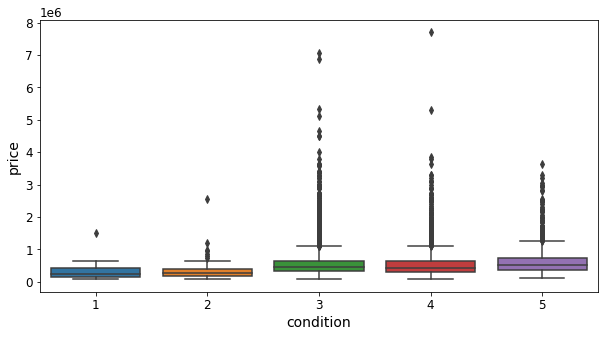

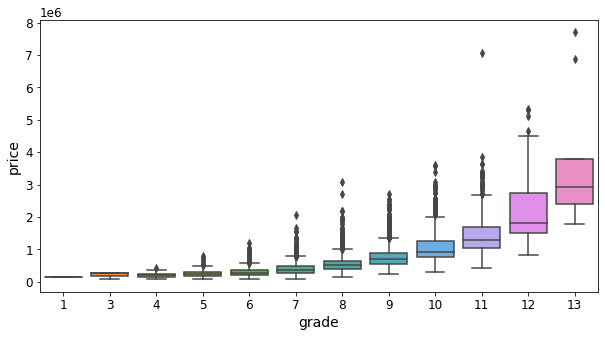

In [14]:
for var in dis_vars:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=var, y='price', data=df_train)
    plt.show()

=> Here are some notes from visualization:

+ In comparison with price, in general, houses with more bedrooms have higher prices. However, the house with 33 bedrooms has price lower than houses with 9 rooms. Due to lack of data for this house, we consider this house is outlier and should handle outliers in the preprocessing step so that it not affect the pattern of this feature

+ For the remaining features including bathrooms, floors, waterfront, view, condtion, grade, it's quite obvious that the higher values corresponding to the higher prices. So these features may be useful in predicting house prices

### <font color=blue>5.6. Examine Continuous vars

sqft_living
Skewness: 1.499530
Kurtosis: 5.592516


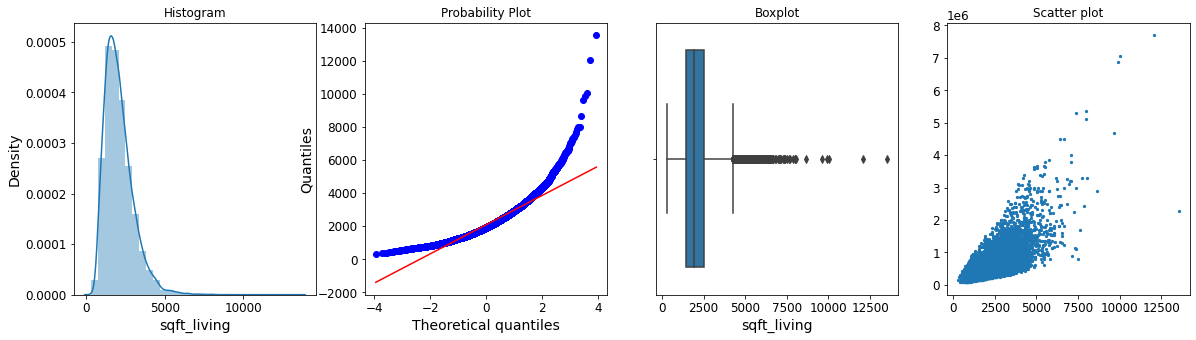

sqft_lot
Skewness: 12.865970
Kurtosis: 277.260712


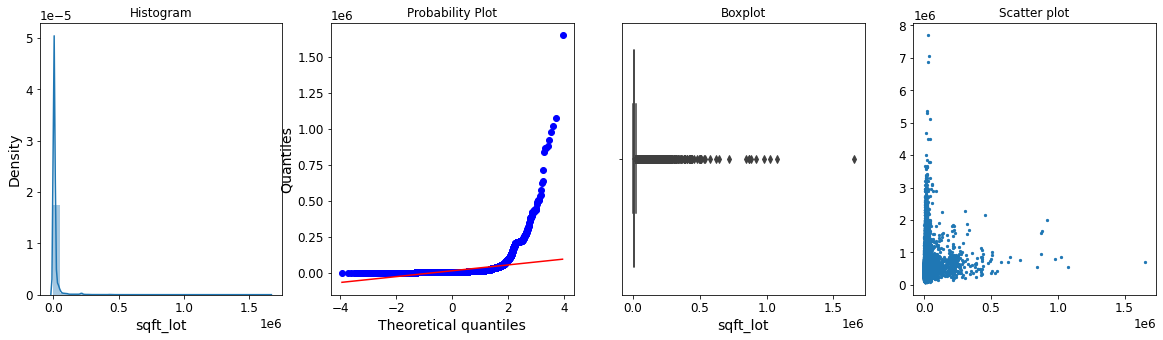

sqft_above
Skewness: 1.468664
Kurtosis: 3.537665


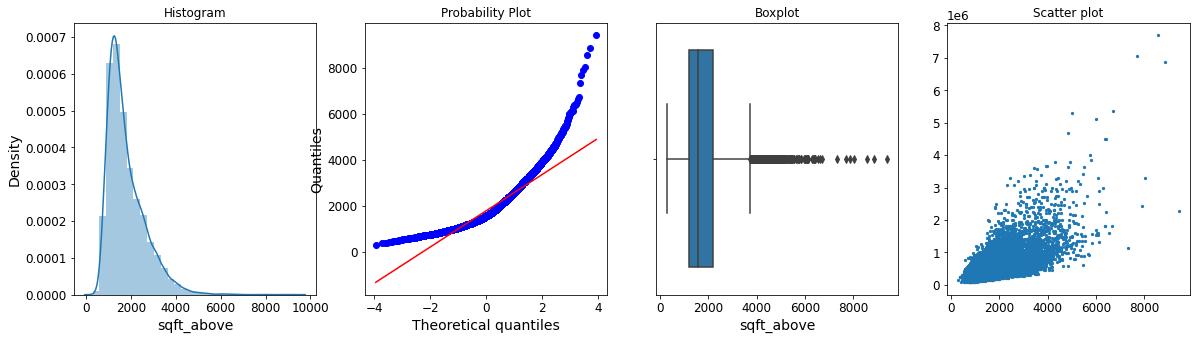

sqft_basement
Skewness: 1.580908
Kurtosis: 2.844424


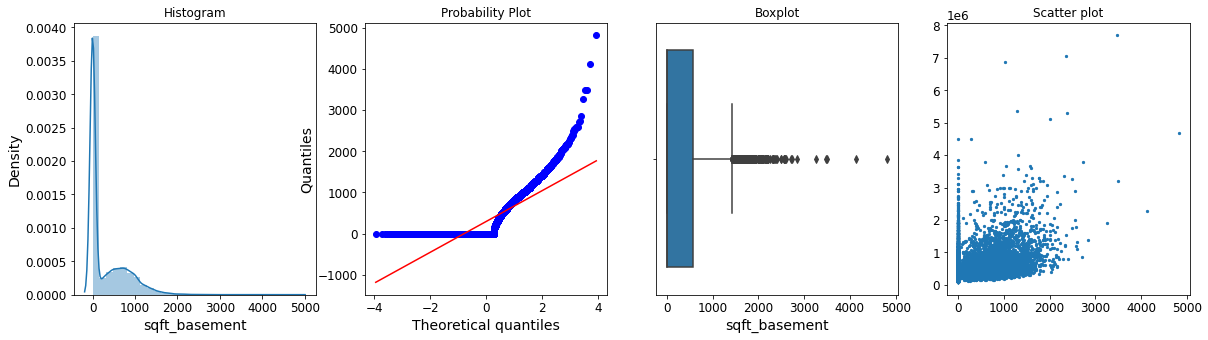

yr_built
Skewness: -0.470066
Kurtosis: -0.659304


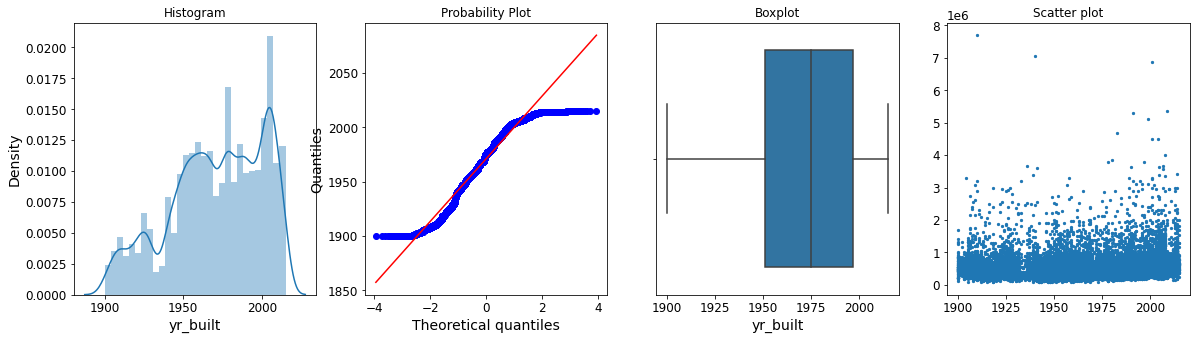

yr_renovated
Skewness: 4.460209
Kurtosis: 17.897003


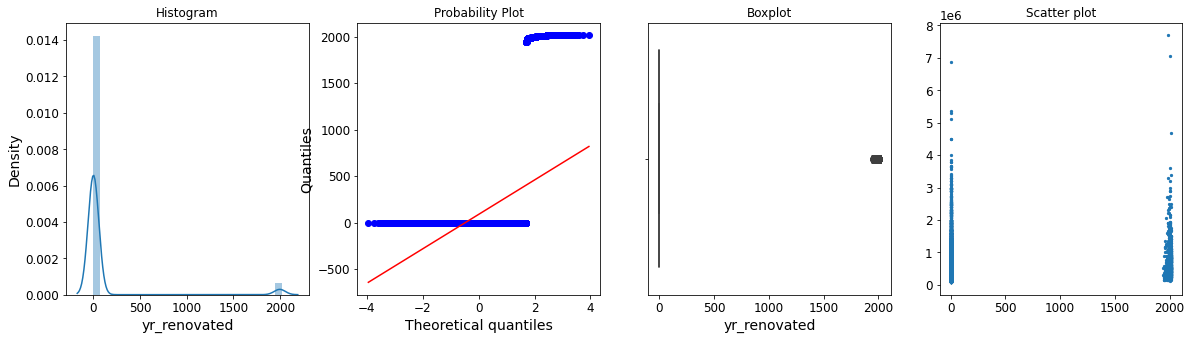

lat
Skewness: -0.500586
Kurtosis: -0.656071


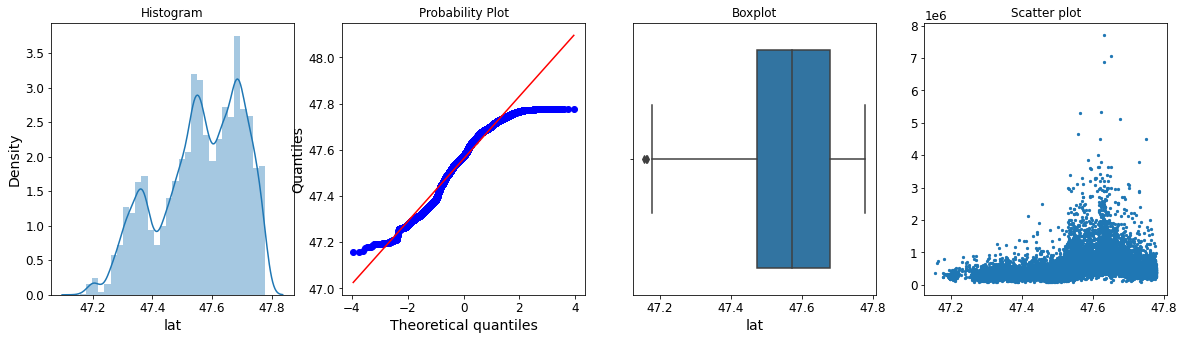

long
Skewness: 0.881561
Kurtosis: 1.020570


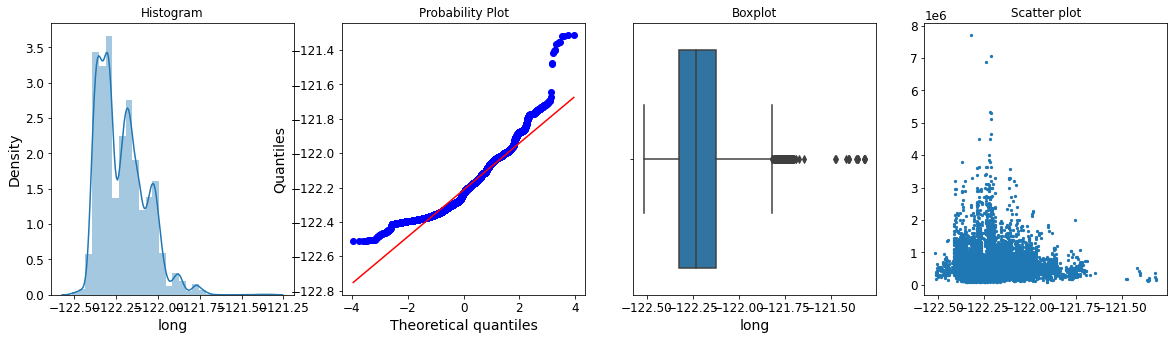

sqft_living15
Skewness: 1.105717
Kurtosis: 1.568366


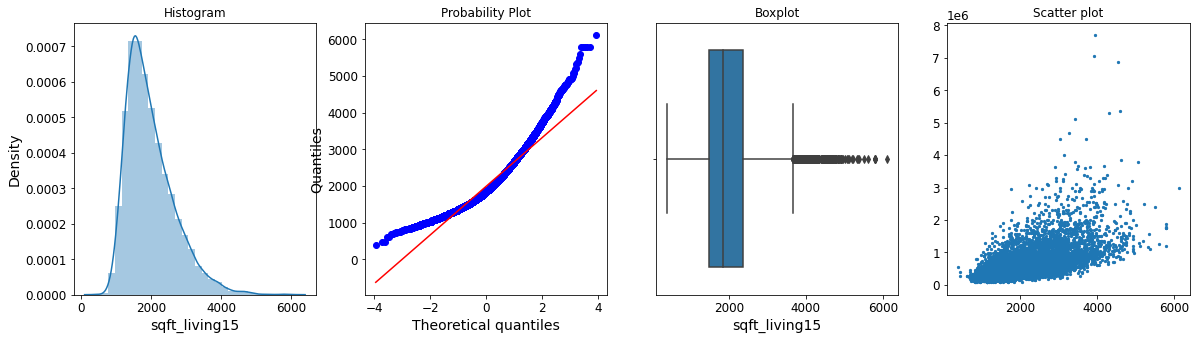

sqft_lot15
Skewness: 9.813916
Kurtosis: 162.928973


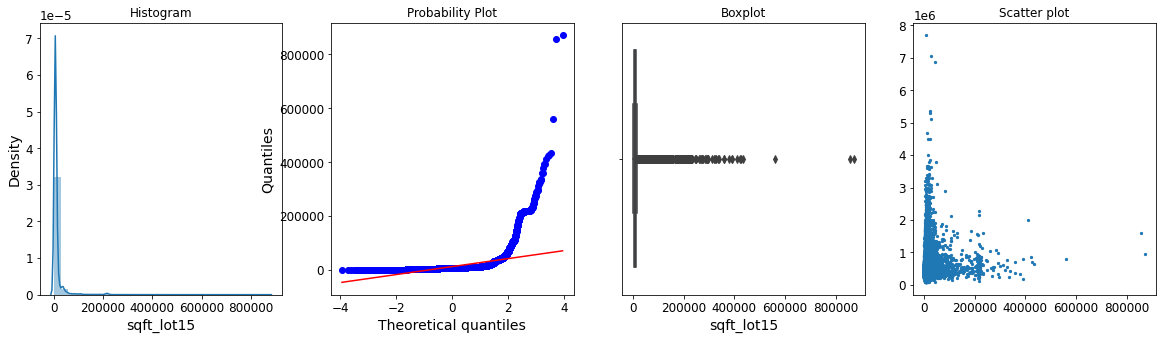

In [15]:
def analyze_continuous_var(var, target):
    plt.figure(figsize=(20,5))
    
    # histogram
    plt.subplot(141)
    sns.distplot(var, bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(142)
    stats.probplot(var, dist='norm', plot=pylab)
    plt.ylabel('Quantiles')
    
    # Boxplot
    plt.subplot(143)
    sns.boxplot(x=var)
    plt.title('Boxplot')
    
    # Scatter plot
    plt.subplot(144)
    plt.scatter(var, target, s=5)
    plt.title("Scatter plot")
    
    # Skewness and kurtosis
    print("Skewness: %f" %var.skew())
    print("Kurtosis: %f" %var.kurt())
    
    plt.show()
    
for var in cont_vars:
    print(var)
    analyze_continuous_var(df_train[var], df_train[target_var])

***Check Normality***: Variables sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, sqft_ratio: 
+ Histograms show data are highly skewed
+ In Q-Q plot, A lot of observations at the lower and upper end depart from the red line, which indicates that the variables are not normally distributed
    
***Check outliers***: 
+ From the Boxplot: it can be seen that there exist outlilers in many variables: sqft_lot15, sqft_living, sqft_lot, 
    
***Check linear relationship***: from the scatter plot, it can be seen
- The relationship between sqft_living, sqft_living15, and price is quite linear apart from a few values around the maximal values, towards the top left side of the plot.
- For variables such as sqft_basement, yr_built, long, lat: Here it is not so clear whether the relationship is linear.
- The relationship is clearly not linear between sqft_lot15, sqft_lot,  and price. 

***Others***:
+ These attributes have very differnt scales => need to apply feature scaling before training the model
+ Most of the houses were built from 1950 to 2020
+ yr_renovated: 0 means it had not been renovated. In feature engineering step, to better capture the pattern of this feature (consistent value), the value 0 should be changed to the year of building the house. Eg., house A was built in 2000 and was not renovated => yr_renovated of house A is 2000, while house B was built in 2000 but was renovated in 2005,  house C was built in 2000 and renovated in 2010. 
+ long and lat are geographical attribute => should be examined in other graph

#### apply transformation to yr_renovated

In [16]:
df_train.loc[df_train['yr_renovated'] > 0, 'yr_renovated'] = 1

#### Examine and fixing vars with heavy tails (extreme outliers)

In [17]:
def find_skewed_boundaries(var, distance):
    # distance passed as an argument, give us the option 
    # to estimate distance times the IQR to calculate the boundaries
    IQR = var.quantile(0.75) - var.quantile(0.25) 
    lower_boundary = var.quantile(0.25) - (IQR * distance)
    upper_boundary = var.quantile(0.75) + (IQR * distance)
    
    print('upper_boundary, lower_boundary: ', upper_boundary, lower_boundary)
    print('total number of var: {}'.format(len(var)))
    print('number of data points with more than upper_boundary (right end outliers): {}'.format(
        (var > upper_boundary).sum()))
    print('number of data points with less than lower_boundary (left end outliers: {}'.format(
        (var < lower_boundary).sum()))
    print('% right end outliers: {}'.format((var > upper_boundary).sum() / len(var)))
    print('% left end outliers: {}'.format((var < lower_boundary).sum() / len(var)))
    
    return upper_boundary, lower_boundary

In [18]:
df_temp = df_train.copy()
skewed_vars = ['bedrooms','sqft_lot', 'sqft_basement', 'sqft_lot15']
for var in skewed_vars:
    print()
    print(var)
    upper_boundary, lower_boundary = find_skewed_boundaries(df_temp[var], 4)
    df_temp.loc[df_temp[var] <= lower_boundary,var] = lower_boundary
    df_temp.loc[df_temp[var] >= upper_boundary,var] = upper_boundary


bedrooms
upper_boundary, lower_boundary:  8.0 -1.0
total number of var: 17290
number of data points with more than upper_boundary (right end outliers): 10
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.000578368999421631
% left end outliers: 0.0

sqft_lot
upper_boundary, lower_boundary:  33432.0 -17685.75
total number of var: 17290
number of data points with more than upper_boundary (right end outliers): 1251
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.07235396182764604
% left end outliers: 0.0

sqft_basement
upper_boundary, lower_boundary:  2850.0 -2280.0
total number of var: 17290
number of data points with more than upper_boundary (right end outliers): 5
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.0002891844997108155
% left end outliers: 0.0

sqft_lot15
upper_boundary, lower_boundary:  30097.5 -14898.0
total number of var: 17

sqft_lot
Skewness: 1.856014
Kurtosis: 2.721569


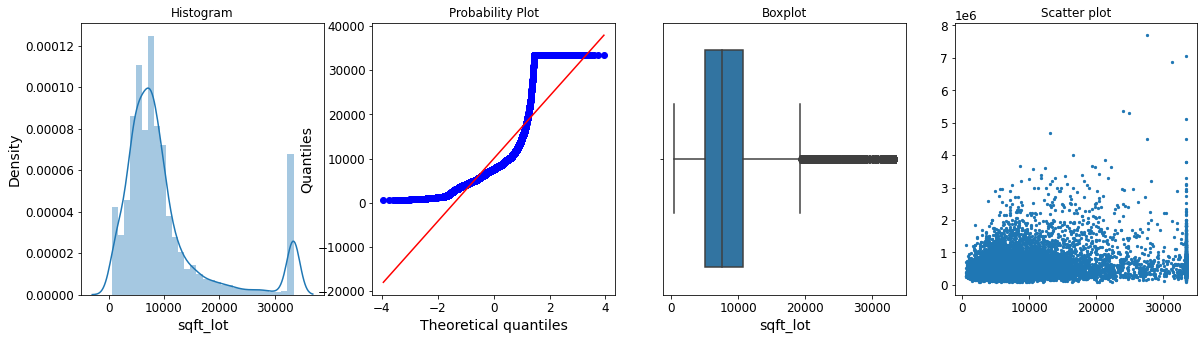

sqft_basement
Skewness: 1.499668
Kurtosis: 1.879273


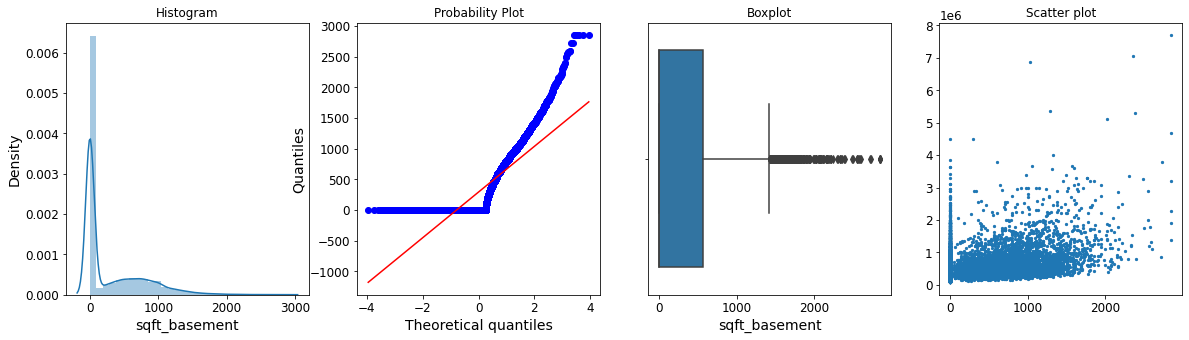

sqft_lot15
Skewness: 1.903415
Kurtosis: 3.140218


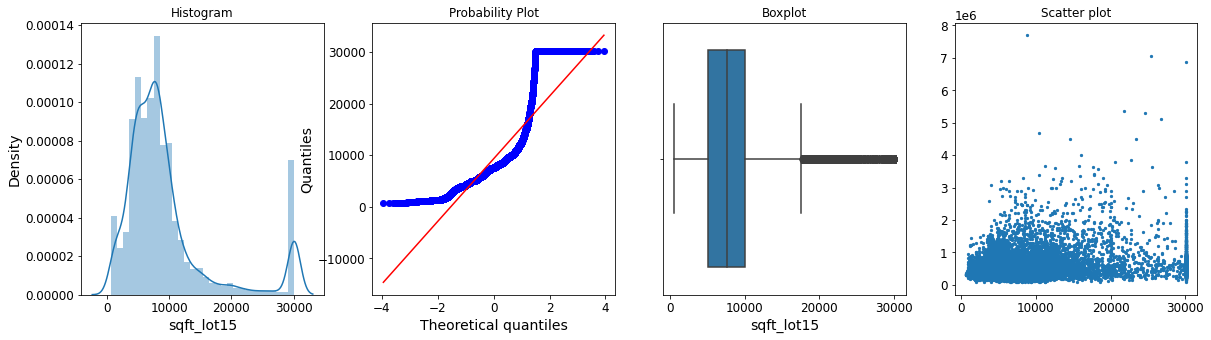

In [19]:
for var in ['sqft_lot', 'sqft_basement', 'sqft_lot15']:
    print(var)
    analyze_continuous_var(df_temp[var], df_temp[target_var])

=> Among continous vars, it seems that only sqft_living and sqft_above have high positive correlation with price

### <font color=blue>5.7. Geographical Data: long, lat

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data

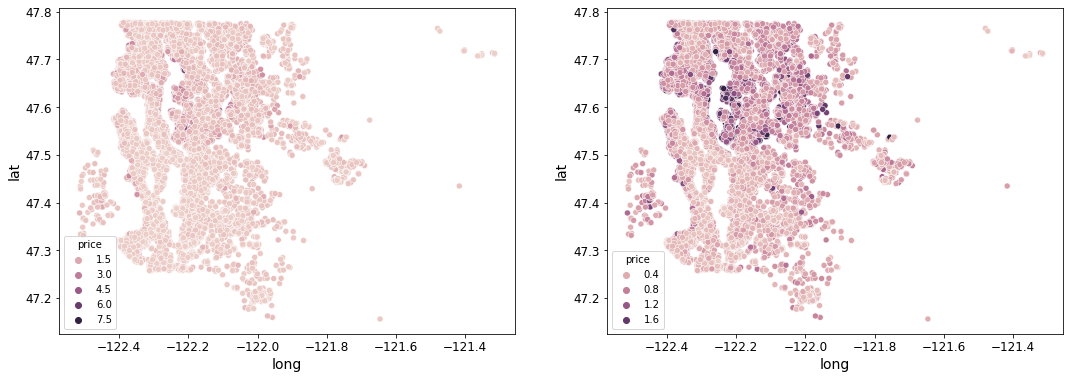

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,6))
sns.scatterplot(x='long', y='lat', data=df_train, hue='price', ax=ax[0])
sns.scatterplot(x='long', y='lat', data=df_train[df_train.price < 2000000], hue='price', ax=ax[1]);

+ The figure on the left hand side shows long, lat of house with price represented by color. Since house prices have extreme outliers, most of the house  have the same color with a few dots darker
+ The figure on the right hand side has removed outliers, hence it's give a better look at areas with high prices. ""It looks like house in the center area is higher than in other areas

### <font color=blue>5.9 Explore categorical variables

In [21]:
cat_vars

['zipcode']

#### Check unique values of each categorical vars

In [22]:
print(df_train['zipcode'].nunique())

70


Zipcode reprsent a specific area or residential zone and is categorical data. If we have domain knowledge, we know which areas house is more expensive than other areas. To extract this information, we can apply data transfomration from categorical data to numeric data by using mean house price of each zipcode as a value corresponding to each zipcode and rank it in increasing order

In [23]:
ordered_labels = df_train.groupby(['zipcode'])['price'].mean().sort_values().index
ordinal_label = {k:i for i,k in enumerate(ordered_labels.values, 0)}
df_train['zipcode_map'] = df_train['zipcode'].map(ordinal_label)
print(ordinal_label)

{98002: 0, 98168: 1, 98032: 2, 98001: 3, 98188: 4, 98148: 5, 98023: 6, 98003: 7, 98030: 8, 98031: 9, 98198: 10, 98055: 11, 98042: 12, 98022: 13, 98178: 14, 98106: 15, 98146: 16, 98092: 17, 98058: 18, 98108: 19, 98038: 20, 98133: 21, 98155: 22, 98118: 23, 98126: 24, 98056: 25, 98019: 26, 98010: 27, 98045: 28, 98014: 29, 98028: 30, 98125: 31, 98166: 32, 98059: 33, 98011: 34, 98070: 35, 98034: 36, 98065: 37, 98136: 38, 98072: 39, 98107: 40, 98117: 41, 98024: 42, 98103: 43, 98144: 44, 98027: 45, 98007: 46, 98029: 47, 98116: 48, 98115: 49, 98122: 50, 98052: 51, 98008: 52, 98077: 53, 98053: 54, 98177: 55, 98074: 56, 98033: 57, 98199: 58, 98075: 59, 98005: 60, 98119: 61, 98006: 62, 98109: 63, 98102: 64, 98105: 65, 98112: 66, 98040: 67, 98004: 68, 98039: 69}


In [24]:
df_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,zipcode_map
0,20150218T000000,3,1.000,1570,5510,1.000,0,0,4,7,1070,500,1940,0,98115,47.694,-122.319,1770,6380,495000.000,49
1,20140808T000000,3,2.500,1780,11000,1.000,0,0,4,8,1210,570,1980,0,98006,47.557,-122.149,2310,9700,635000.000,62
2,20150414T000000,3,1.500,1090,9862,1.000,0,0,3,8,1090,0,1987,0,98074,47.626,-122.036,1710,9862,382500.000,56
3,20140617T000000,4,2.500,2210,7079,2.000,0,0,3,8,2210,0,1993,0,98031,47.421,-122.183,1970,7000,382500.000,9
4,20141020T000000,3,2.500,1800,4763,2.000,0,0,3,7,1240,560,1985,0,98119,47.646,-122.362,1790,4763,670000.000,61


<Axes: xlabel='long', ylabel='lat'>

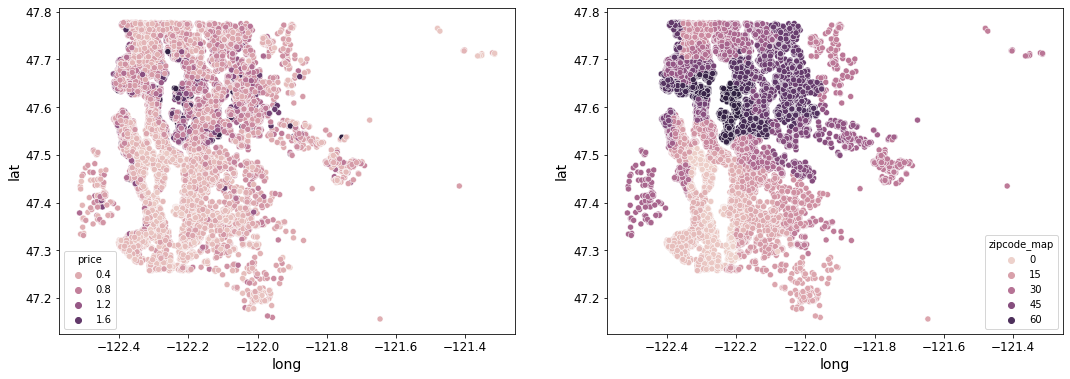

In [25]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='long',y='lat',data=df_train[(df_train.price < 2000000)],hue='price')
plt.subplot(122)
sns.scatterplot(x='long',y='lat',data=df_train[(df_train.price < 2000000)],hue='zipcode_map')

=> Zipcode and Long,lat attributes represent the same pattern which is the geographical information about the area with high price and low price, however, zipcode  seems to provide more details

Skewness: -0.019762
Kurtosis: -1.158516


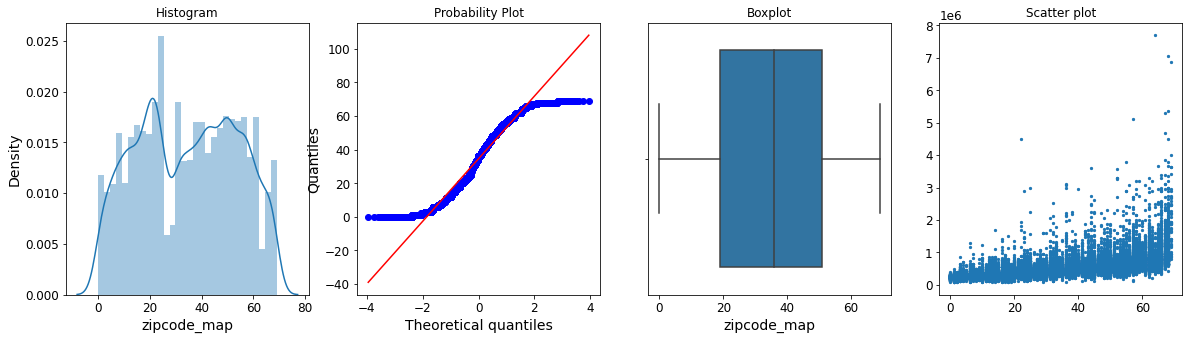

In [26]:
analyze_continuous_var(df_train['zipcode_map'], df_train[target_var])

### <font color=blue>5.9. Explore Temporal Vars

In [27]:
# Here, we can create additiontal features such as month, year, season to examine if this information is relevant to house price
df_train['date'] =  pd.to_datetime(df_train['date'])
df_train['month'] = df_train['date'].apply(lambda date:date.month)
df_train['year'] = df_train['date'].apply(lambda date:date.year)
df_train['season'] = 'NA'
df_train.loc[df_train.month.isin([12,1,2]), 'season'] = 'winter'
df_train.loc[df_train.month.isin([3,4,5]), 'season'] = 'spring'
df_train.loc[df_train.month.isin([6,7,8]), 'season'] = 'summer'
df_train.loc[df_train.month.isin([9,10,11]), 'season'] = 'autumn'

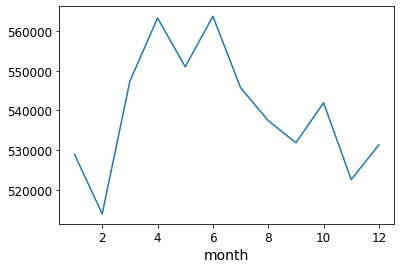

In [28]:
df_train.groupby('month').mean()['price'].plot();

It looks like there's some behaviral of month's sale

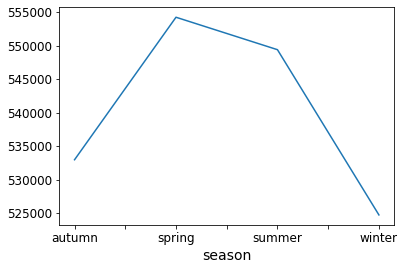

In [29]:
df_train.groupby('season').mean()['price'].plot();

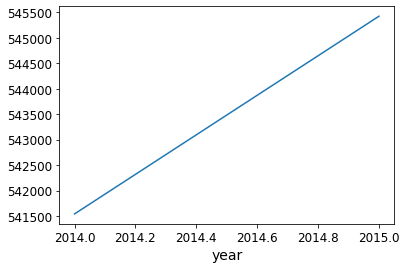

In [30]:
df_train.groupby('year').mean()['price'].plot();

=> It can be seen that sale house in spring is a bit higher than other seasons, and overall, house prices in 2015 is a bit increase compared to in 2014

### <font color=blue>5.10. Derive new features

#### create new feature sqft_ratio

This feature represents the ratio between living's area of the house and other houses' living areas in the same neighborhood

In [31]:
df_train['sqft_ratio'] = df_train.sqft_living / df_train.sqft_living15
df_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,zipcode_map,month,year,season,sqft_ratio
0,2015-02-18,3,1.000,1570,5510,1.000,0,0,4,7,1070,500,1940,0,98115,47.694,-122.319,1770,6380,495000.000,49,2,2015,winter,0.887
1,2014-08-08,3,2.500,1780,11000,1.000,0,0,4,8,1210,570,1980,0,98006,47.557,-122.149,2310,9700,635000.000,62,8,2014,summer,0.771
2,2015-04-14,3,1.500,1090,9862,1.000,0,0,3,8,1090,0,1987,0,98074,47.626,-122.036,1710,9862,382500.000,56,4,2015,spring,0.637
3,2014-06-17,4,2.500,2210,7079,2.000,0,0,3,8,2210,0,1993,0,98031,47.421,-122.183,1970,7000,382500.000,9,6,2014,summer,1.122
4,2014-10-20,3,2.500,1800,4763,2.000,0,0,3,7,1240,560,1985,0,98119,47.646,-122.362,1790,4763,670000.000,61,10,2014,autumn,1.006


### <font color=blue>5.11. Multivariate Analysis

#### Correlations between independent vars and dependent var

The correlation coefficient only measures linear correlations ("if x goes up, then y generally goes up/down"). It may completely miss out on nonlinear relationship (e.g., "if x is close to zero then y generally goes up").

In [32]:
corr_matrix = df_train.corr()
corr_matrix['price'].abs().sort_values(ascending=False)

price           1.000
sqft_living     0.704
grade           0.663
sqft_above      0.608
sqft_living15   0.584
zipcode_map     0.570
bathrooms       0.525
view            0.404
sqft_basement   0.326
bedrooms        0.313
sqft_ratio      0.306
lat             0.303
waterfront      0.284
floors          0.255
yr_renovated    0.132
sqft_lot        0.090
sqft_lot15      0.081
yr_built        0.050
condition       0.039
long            0.019
month           0.010
year            0.005
Name: price, dtype: float64

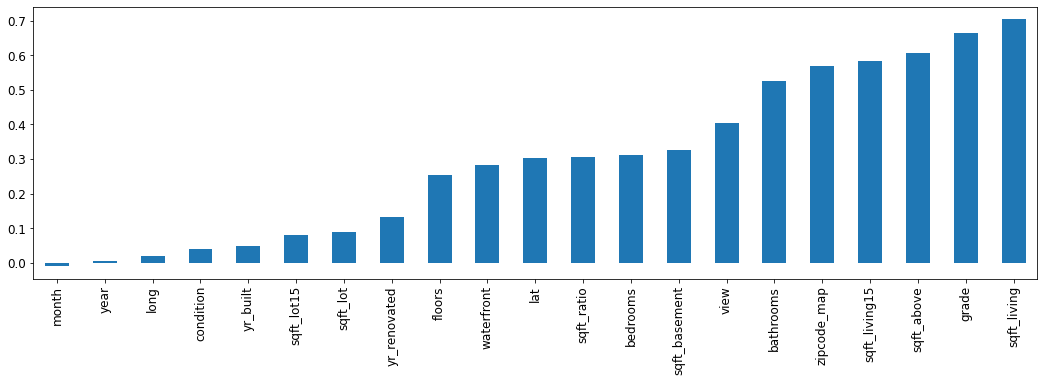

In [33]:
plt.figure(figsize = (18,5))
df_train.corr()['price'].sort_values().drop('price').plot(kind='bar')
plt.show()

It looks like sqft_living has very high correlation with the actual price of the house. 

#### Correlations between independent vars to check multicollinearity

<Axes: >

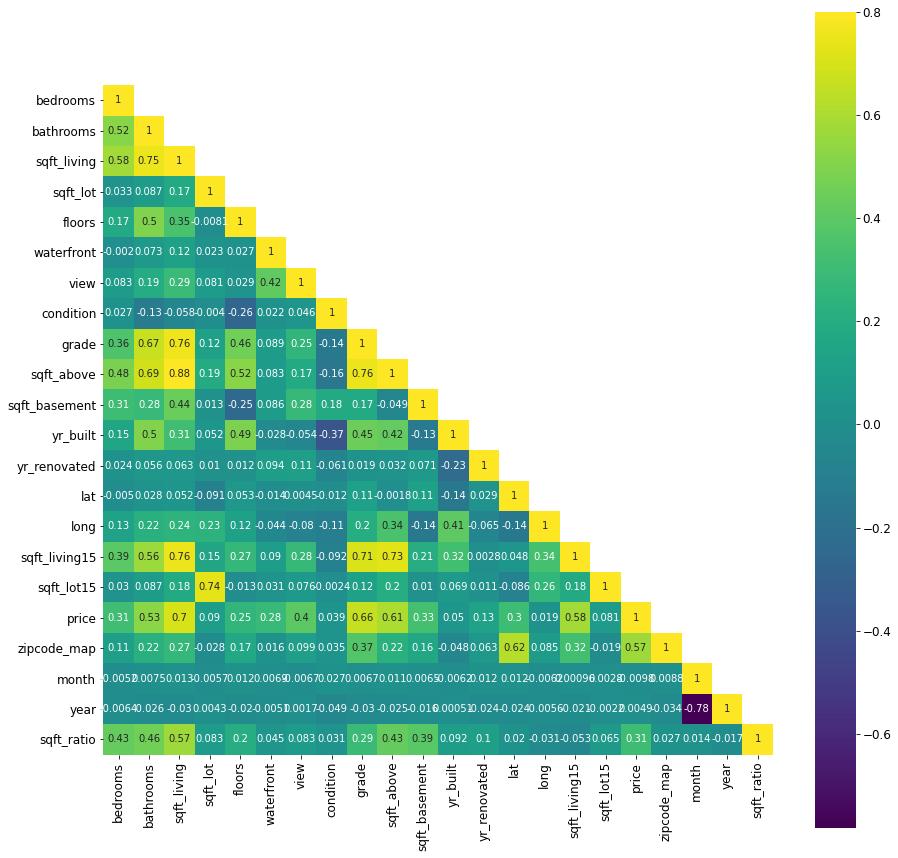

In [34]:
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True, annot=True,  cmap='viridis')

Features have high correlations with many other features: sqft_living, bathrooms, grade, sqft_above => The dataset has multicollinearity problem, this problem should be resolved to reduce violation in linear regression model

---
---
[content table](#content_table)
<a id="summary"></a>
# <font color=red> 6. Summary
    
Afer performing Exploratory Data Analysis step, we now have knowledge and strategies to prepare the final data for Machine Learning algorithms. For this dataset, the following tasks will be applied to transform data:
    
**Tasks for processing step**

1. Select features of interest: only remove column id
2. For Numeric vars:
    + Handling outliers in heavily skewed features
    + Transform price in linear regression model
    + scaling data
    + replace yr_renovated = 0 with yr_built
3. For Categorical vars:
    + Encode cat vars - calculate average price for per zipcode
4. For temporal vars:
    + convert obj var to date time var: date
    + create new feature season from attribute date
5. Handling missing data: Not necessary
6. Check and remove vars with high correlation